# Stattutor Lab: Cell Phones

College students at a large state university completed a survey about their academic and personal life. Questions ranged from "How many credits are you registered for this semester?" to "Would you define yourself as a vegetarian?" Four sections of an introductory statistics course were chosen at random from all the sections of introductory statistics courses offered at the university in the semester when the survey was conducted, and the 312 students who completed the survey were students registered in one of the four chosen sections.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.weightstats import DescrStatsW

%matplotlib inline
sns.set()

In [2]:
data = pd.read_excel('cell_phones.xls')

In [3]:
data.head()

,Math,Verbal,Credits,Year,Exer,Sleep,Veg?,Cell
0,640,470,15,1,60,7.0,no,yes
1,660,650,14,1,20,7.5,no,yes
2,550,580,15,2,0,9.0,no,no
3,560,660,16,1,30,7.0,no,yes
4,600,790,15,4,45,6.5,some,no


**Math**: Math SAT score

**Verbal**: Verbal SAT score

**Credits**: Number of credits the student is registered for

**Year**: Year in college (1=Freshman, 2=Sophomore, 3=Junior, 4=Senior)

**Exer**: Time (in minutes) spent exercising in a typical day

**Sleep**: Time (in hours) spent sleeping in a typical day

**Veg**: Are you a vegetarian (yes, no, some)

**Cell**: Do you own a cell phone (yes, no)

In [4]:
data.dtypes

Math        object
Verbal      object
Credits     object
Year        object
Exer        object
Sleep      float64
Veg?        object
Cell        object
dtype: object

## Fix Types

In [5]:
data.columns

Index(['Math', 'Verbal', 'Credits', 'Year', 'Exer', 'Sleep', 'Veg?', 'Cell'], dtype='object')

In [6]:
for col in data.columns[:-2]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [7]:
data['Cell'] = data.Cell.replace({'yes': True, 'no': False}).astype('bool')
data['Veg?'] = data['Veg?'].astype('category', categories=['no', 'some', 'yes'], ordered=True)

/Users/chico/.pyenv/versions/3.6.3/envs/dc/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [8]:
data.dtypes

Math        float64
Verbal      float64
Credits     float64
Year        float64
Exer        float64
Sleep       float64
Veg?       category
Cell           bool
dtype: object

## Check data format

### Out of the first ten students in the datafile, how many did better on the verbal portion of the SAT compared to the math portion?

In [9]:
data[:10].loc[data.Math < data.Verbal]

,Math,Verbal,Credits,Year,Exer,Sleep,Veg?,Cell
2,550.0,580.0,15.0,2.0,0.0,9.0,no,False
3,560.0,660.0,16.0,1.0,30.0,7.0,no,True
4,600.0,790.0,15.0,4.0,45.0,6.5,some,False
5,560.0,640.0,16.0,2.0,75.0,4.5,yes,False
6,550.0,660.0,14.0,1.0,30.0,7.0,no,True
8,540.0,560.0,16.0,1.0,30.0,7.0,no,False


### Out of the first ten students in the datafile, how many are at least somewhat vegetarian?

In [10]:
data[:10].loc[data['Veg?'] >= 'some']

,Math,Verbal,Credits,Year,Exer,Sleep,Veg?,Cell
4,600.0,790.0,15.0,4.0,45.0,6.5,some,False
5,560.0,640.0,16.0,2.0,75.0,4.5,yes,False
7,600.0,560.0,13.0,1.0,0.0,7.0,yes,True


### How many hours does the first junior in the datafile who does not own a cell phone spend sleeping in a typical day?

In [26]:
data.loc[(data.Year == 3) & (data.Cell == False)]

,Math,Verbal,Credits,Year,Exer,Sleep,Veg?,Cell
17,720.0,720.0,17.0,3.0,45.0,6.5,no,False
28,740.0,800.0,16.0,3.0,0.0,6.0,no,False
35,500.0,650.0,12.0,3.0,0.0,7.0,no,False
46,NaN,NaN,17.0,3.0,30.0,4.0,no,False
64,690.0,600.0,20.0,3.0,0.0,7.0,no,False
191,520.0,760.0,16.0,3.0,30.0,7.0,some,False
197,530.0,580.0,14.0,3.0,25.0,6.0,some,False
261,580.0,600.0,12.0,3.0,40.0,8.5,some,False
264,570.0,600.0,16.0,3.0,30.0,6.0,no,False
300,740.0,520.0,15.0,3.0,20.0,9.0,no,False


## Questions

### The mean verbal SAT score of all the students in this university is 580. Is this also the case for all stat students at this university? Note that verbal SAT scores in the U.S. have a standard deviation of 111.

Ho: u = 580  
Ha: u != 580

**Two sided**

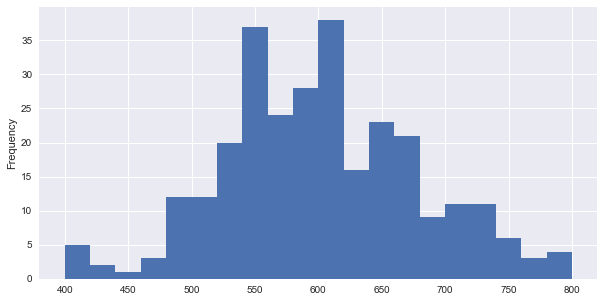

In [12]:
data.Verbal.plot.hist(bins=20, figsize=(10, 5))

The sample verbal scores of stats students appear to be normally distributed and withoud outliers.

In [13]:
data.Verbal.describe()

count    286.000000
mean     596.713287
std       77.845111
min      400.000000
25%      542.500000
50%      590.000000
75%      650.000000
max      800.000000
Name: Verbal, dtype: float64

#### Z-statistic

In [14]:
(data.Verbal.mean() - 580)/(111/np.sqrt(286))

2.5463722998448794

#### p-value

In [15]:
.0054 * 2

0.0108

#### 95% confidence interval

In [16]:
error = 2*(111/np.sqrt(286))
(data.Verbal.mean()-error, data.Verbal.mean()+error)

(583.586151522329, 609.8404219042444)

Z-test can be made as the sample is big, is random, and is normal.

The distribution appears to be normal, as the histogram shows, with a mean of 596.71 in a sample of 286, the p-value for the two-sided z-test is 0.01.

In the 5% significance test, the result is significant, in a sample of 286 is very rare to observe such a mean. In conclusion the null hypothesis Ho can be rejected, and the alternative Ha can be accepted, in general stats students obtain different scores on the Verbal SAT test than the rest of the college students of the us.

The mean of stats students Verbal scores is between (583.586151522329, 609.8404219042444), it makes sense that it does not include the general population mean of 580, as SAT Verbal scores of stats students is significantly different than the general population, we can also conclude that is in general higher than the general population.

### Based on a recent study, roughly 80% of college students in the U.S. own a cell phone. Do the data provide evidence that the proportion of students who own cell phones in this university is lower than the national figure?

Ho: p = .80  
Ha: p < .80  
**one sided**

In [17]:
data.Cell.describe()

count      312
unique       2
top       True
freq       245
Name: Cell, dtype: object

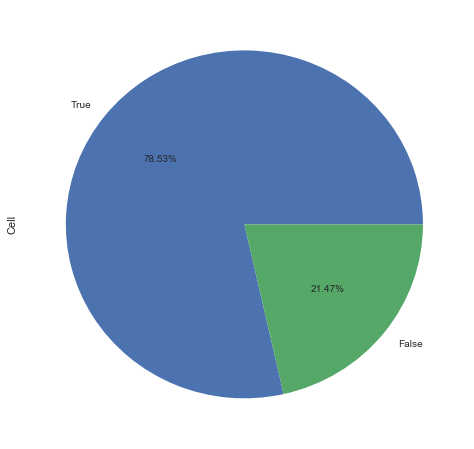

In [18]:
data.Cell.value_counts().plot.pie(autopct='%.2f%%', figsize=(8, 8))

In [19]:
data.Cell.value_counts()

True     245
False     67
Name: Cell, dtype: int64

In [20]:
own_cellphones = 245/(245+67)
own_cellphones

0.7852564102564102

#### z-statistic

In [21]:
z = (own_cellphones - .80)/np.sqrt((.80 * (1-.80))/312)
z

-0.6510592946331453

#### p-value

.2578

A p-value of .2578 means that the probability of observing this king of proportion in a sample of 312, when the population proportion is .80 is high, especially in the 5% significance test. In other words, the null hypotesis cannot be rejected, and as expected the proportion of students that own cellphones in this college is not any different from any other college in the us.

### Adults in the U.S. average 7 hours of sleep a night. Is this also the mean for all stat students at this university?

Ho: u = 7   
Ha: u != 7  
**two sided test**

In [22]:
data.Sleep.describe()

count    312.00000
mean       7.19391
std        1.42217
min        3.00000
25%        6.50000
50%        7.00000
75%        8.00000
max       15.00000
Name: Sleep, dtype: float64

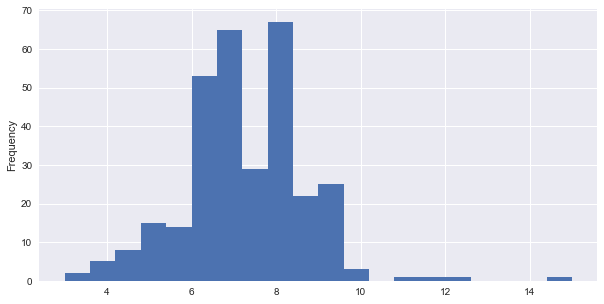

In [23]:
data.Sleep.plot.hist(bins=20, figsize=(10, 5))

There appears to be some outliers in this distribution. Other than that it appears roughly normally shaped, the sample is random and is large enough for the central limit theory to kick in, considering that the standard deviation for the population is unknown the t-test will be used.

#### t-test

In [24]:
t, pval, df = DescrStatsW(data.Sleep).ttest_mean(7, 'two-sided')
print(t, pval, df)

2.4083887350895785 0.016604598070675162 311.0


#### 95% confidence interval

In [25]:
DescrStatsW(data.Sleep).tconfint_mean(alpha=0.05, alternative='two-sided')

(7.035488190686921, 7.3523323221335914)

P-value is low, 1.6% < 5%, this means that the result is significant, and not caused by change. The null hypothesis can be rejected, and we can conclude that the stats students in this particular college sleep habits are different (higher) than that from the general us adult population, with the 95% confidence interval we can have an idea of what the mean sleep hours per night is for this college stats students.